### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import datetime as dt

#### Ques1.
Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.


In [4]:
# importing data:
cust_data = pd.read_csv('cust_demographics.csv')
cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
claims = pd.read_csv('claims.csv', sep=',')
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [6]:
claims.shape

(1100, 10)

In [7]:
cust_data.shape

(1085, 6)

In [8]:
# Merging the two dfs:

cust_claim = pd.merge(left=cust_data, right=claims, left_on='CUST_ID', right_on='customer_id')
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [9]:
cust_claim.shape

(1085, 16)

In [10]:
#Checking for null values

cust_claim.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [11]:
# checking for CUST_ID and customer_id

cust_claim[cust_claim['CUST_ID'] != cust_claim['customer_id']]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent


In [12]:
# Dropping customer_id

cust_claim.drop(columns=['customer_id'], inplace=True)

In [13]:
# checking for Duplicates

cust_claim[cust_claim.duplicated()]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent


--------------------------------------------------------

### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.



In [14]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [15]:
# Convert the datatype of DateOfBirth and claim_date to datetime from object

cust_claim.DateOfBirth = pd.to_datetime(cust_claim.DateOfBirth, format = '%d-%b-%y')

cust_claim.claim_date = pd.to_datetime(cust_claim.claim_date, format ='%m/%d/%Y')

In [16]:
cust_claim.DateOfBirth

0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1984-03-11
4      1986-05-01
          ...    
1080   1981-03-15
1081   1996-07-07
1082   1990-04-11
1083   2064-10-22
1084   1995-07-12
Name: DateOfBirth, Length: 1085, dtype: datetime64[ns]

In [17]:
#converting DateOfBirth col to 19XX format as can see in the end of data:the year in DOB is more than current_year 2020 :

# step1: fetching today's date:

today_date = dt.datetime.now()
today_date

# step 2: Get the current_year

current_year = today_date.year
current_year


2020

In [18]:
# converting the DateOfBirth col:

cust_claim['DateOfBirth'] = np.where(cust_claim.DateOfBirth.dt.year > current_year, 
                             cust_claim.DateOfBirth - pd.DateOffset(years=100), cust_claim.DateOfBirth)

In [19]:
cust_claim.DateOfBirth

0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1984-03-11
4      1986-05-01
          ...    
1080   1981-03-15
1081   1996-07-07
1082   1990-04-11
1083   1964-10-22
1084   1995-07-12
Name: DateOfBirth, Length: 1085, dtype: datetime64[ns]

In [20]:
cust_claim.claim_date

0      2017-11-27
1      2018-10-03
2      2018-02-02
3      2018-04-04
4      2018-06-17
          ...    
1080   2018-09-06
1081   2017-05-09
1082   2017-05-15
1083   2017-04-18
1084   2017-03-16
Name: claim_date, Length: 1085, dtype: datetime64[ns]

In [21]:
# Converting total_policy_claims from float64 to int64

cust_claim.total_policy_claims = pd.to_numeric(cust_claim.total_policy_claims)

-----------------------------------------------------

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.


In [22]:
cust_claim.claim_amount = cust_claim.claim_amount.astype(str).apply(lambda x:x.replace('$',''))
cust_claim.claim_amount = pd.to_numeric(cust_claim.claim_amount, errors='coerce')

In [23]:
cust_claim.claim_amount = cust_claim.claim_amount.astype(str)
cust_claim.claim_amount = cust_claim.claim_amount.str.replace('$','')
cust_claim.claim_amount = pd.to_numeric(cust_claim.claim_amount, errors='coerce')

In [24]:
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [25]:
cust_claim.claim_amount.dtype

dtype('float64')

-----------------------------------------------------

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.


if claim == injury then if that's not reported to police then create a flag for it

In [26]:
cust_claim['flag']  = np.where(((cust_claim.claim_type == 'Injury only') & (cust_claim.police_report == 'No'))
            | ((cust_claim.claim_type == 'Material and injury') & (cust_claim.police_report == 'No')),1,0)

In [27]:
cust_claim[(cust_claim.claim_type == 'Injury only')]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
8,21831191,Male,1977-05-17,NH,419-712-8513,Gold,24050443,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,1
18,18288638,Female,1969-01-14,MI,314-135-1359,Platinum,67257404,Other driver error,2018-04-24,Auto,Yes,Injury only,32560.0,1.0,No,0
21,63916778,Male,1966-09-07,IL,146-157-4572,Platinum,7809917,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No,1
22,17004138,Female,1965-08-13,WA,436-354-4682,Silver,29205389,Natural causes,2017-06-25,Auto,No,Injury only,31380.0,1.0,No,1
23,9667764,Female,1979-10-10,SC,643-978-8251,Platinum,19051665,Other causes,2017-12-17,Auto,Yes,Injury only,36190.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,90217818,Female,1980-05-18,TN,891-651-8671,Gold,85546357,Other driver error,2017-06-04,Auto,No,Injury only,37743.0,1.0,Yes,1
1064,75934330,Female,1987-10-09,ME,951-941-3975,Platinum,56358443,Natural causes,2017-01-01,Auto,Yes,Injury only,20630.0,1.0,No,0
1072,51669975,Female,1988-02-05,ND,975-463-9541,Silver,50800999,Other causes,2018-09-19,Home,Yes,Injury only,38950.0,1.0,No,0
1074,87596868,Male,1961-11-18,AZ,573-396-3182,Silver,36599575,Driver error,2018-10-09,Auto,Unknown,Injury only,33330.0,2.0,No,0


In [28]:
cust_claim[(cust_claim.claim_type == 'Material and injury')]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
9,21831191,Male,1977-05-17,NH,419-712-8513,Gold,91475471,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,0
15,51583214,Male,1999-10-31,NH,743-486-5264,Platinum,28564401,Other driver error,2017-12-10,Auto,Unknown,Material and injury,16690.0,1.0,No,0
30,32155446,Male,1985-05-07,AZ,847-936-7645,Gold,71088680,Driver error,2017-12-24,Auto,No,Material and injury,32640.0,4.0,No,1
43,34790013,Male,1979-01-17,NY,935-615-6297,Platinum,13578273,Other driver error,2017-12-24,Auto,Yes,Material and injury,33040.0,5.0,No,0
44,53333796,Male,1990-05-23,RI,857-215-9123,Gold,22639991,Other causes,2018-10-09,Auto,Yes,Material and injury,25320.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,81634435,Male,1988-07-30,AR,937-675-5842,Gold,93043462,Other driver error,2017-01-27,Home,Unknown,Material and injury,NaN,1.0,No,0
1054,51033228,Male,1985-10-13,IN,534-462-2657,Gold,50927161,Driver error,2018-10-23,Auto,No,Material and injury,30890.0,2.0,No,1
1057,20923121,Female,1976-07-05,NY,617-927-8491,Silver,78104894,Natural causes,2018-05-14,Auto,No,Material and injury,31210.0,1.0,No,1
1061,57267299,Male,1970-02-11,VT,128-576-3825,Silver,365998,Other driver error,2017-12-03,Auto,Yes,Material and injury,25140.0,2.0,No,0


-----------------------------------------------------

### Ques5. 

One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID
should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.


In [29]:
cust_claim.drop_duplicates(subset = 'CUST_ID',keep = 'last', inplace=True)

In [30]:
cust_claim.shape

(1078, 16)

In [31]:
# info
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1078 non-null   int64         
 1   gender               1078 non-null   object        
 2   DateOfBirth          1078 non-null   datetime64[ns]
 3   State                1078 non-null   object        
 4   Contact              1078 non-null   object        
 5   Segment              1078 non-null   object        
 6   claim_id             1078 non-null   int64         
 7   incident_cause       1078 non-null   object        
 8   claim_date           1078 non-null   datetime64[ns]
 9   claim_area           1078 non-null   object        
 10  police_report        1078 non-null   object        
 11  claim_type           1078 non-null   object        
 12  claim_amount         1013 non-null   float64       
 13  total_policy_claims  1068 non-nul

-----------------------------------------------------

### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [32]:
# checking for null values

cust_claim.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
flag                    0
dtype: int64

In [33]:
# Continuous Variables
cust_claim['claim_amount'].fillna(cust_claim['claim_amount'].mean(), inplace=True)

In [34]:
#Categorical variables:
cust_claim['total_policy_claims'].fillna(cust_claim.total_policy_claims.mode().iloc[0], inplace=True)

In [35]:
cust_claim.total_policy_claims.value_counts()

1.0    789
2.0    105
3.0     85
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [36]:
cust_claim.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
flag                   0
dtype: int64

In [37]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1078 non-null   int64         
 1   gender               1078 non-null   object        
 2   DateOfBirth          1078 non-null   datetime64[ns]
 3   State                1078 non-null   object        
 4   Contact              1078 non-null   object        
 5   Segment              1078 non-null   object        
 6   claim_id             1078 non-null   int64         
 7   incident_cause       1078 non-null   object        
 8   claim_date           1078 non-null   datetime64[ns]
 9   claim_area           1078 non-null   object        
 10  police_report        1078 non-null   object        
 11  claim_type           1078 non-null   object        
 12  claim_amount         1078 non-null   float64       
 13  total_policy_claims  1078 non-nul

-----------------------------------------------------

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18\
Youth 18-30\
Adult 30-60\
Senior > 60



In [38]:
# Step 1: Get current date and year

today_date = dt.datetime.now().date()
today_date

# step 2: convert to Pandas' format

today_Date = pd.to_datetime(today_date)
today_Date

Timestamp('2020-08-15 00:00:00')

In [39]:
# Calculate the Age

age_days = today_Date - cust_claim.DateOfBirth

# convert age_days from dtype: timedelta64[ns] to int

age = age_days.dt.days
age

0       15191
1       18477
3       13306
5       12525
7       15800
        ...  
1080    14398
1081     8805
1082    11084
1083    20386
1084     9166
Name: DateOfBirth, Length: 1078, dtype: int64

In [40]:
# Creating column Age in Cust_claim df
cust_claim['Age'] = round(age/365.25,0)

In [41]:
# Creating Age Group

cust_claim['Age_Group'] = np.where(cust_claim.Age <18, 'Children',
                            np.where(((cust_claim.Age >= 18) & (cust_claim.Age<30)),'Youth',
                                   np.where(((cust_claim.Age >= 30) & (cust_claim.Age<60)), 'Adult','Senior')))

In [42]:
cust_claim.tail()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_Group
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,0,39.0,Adult
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0,24.0,Youth
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,0,30.0,Adult
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0,56.0,Adult
1084,61575264,Male,1995-07-12,WY,182-385-1392,Gold,63226031,Natural causes,2017-03-16,Auto,No,Material only,1490.0,1.0,No,0,25.0,Youth


-----------------------------------------------------

### 8. What is the average amount claimed by the customers from various segments?


In [43]:
cust_claim.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12846.386178
Platinum,12371.644999
Silver,12267.146560


-----------------------------------------------------

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.


In [44]:
# step 1: Fetching 20 days before 1st Oct 2018:
date= '2018-10-01'
date=pd.to_datetime(date, format = '%Y-%m-%d')
d = date.date()
d

datetime.date(2018, 10, 1)

In [45]:
offset_date = d- pd.DateOffset(days=20)
offset_date

Timestamp('2018-09-11 00:00:00')

In [46]:
# step 2: Creating new df with filtered dates:
new_df = cust_claim.loc[cust_claim.claim_date <= "2018-09-11",:].reset_index(drop=True)
new_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_Group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,42.0,Adult
1,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,36.0,Adult
2,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,0,34.0,Adult
3,21831191,Male,1977-05-17,NH,419-712-8513,Gold,91475471,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,0,43.0,Adult
4,18401412,Male,1999-03-02,AR,752-398-2914,Gold,12878692,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,0,21.0,Youth


In [47]:
# step 3: Applying the condition on the new_df2 to find the total claim amount for incident_cause and claim_type

new_df.pivot_table(index=['incident_cause','claim_type'], values=['claim_amount'], aggfunc=np.sum, margins=True).round(0)

claim_amount
incident_cause     claim_type                       
Crime              Injury only              306308.0
                   Material and injury      203828.0
                   Material only            211801.0
Driver error       Injury only             1173743.0
                   Material and injury     1789380.0
                   Material only            352725.0
Natural causes     Injury only              411736.0
                   Material and injury      555077.0
                   Material only            345932.0
Other causes       Injury only             1512080.0
                   Material and injury     1820156.0
                   Material only            390911.0
Other driver error Injury only             1284848.0
                   Material and injury     1689713.0
                   Material only            302971.0
All                                       12351211.0

-----------------------------------------------------

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?


In [48]:
# Step 1: creating a new dataframe filtering for Adult Age Group and taking State and Incident Casue as the columns

new_df1 = cust_claim[cust_claim.Age_Group =='Adult'][['State','incident_cause','Age_Group']].reset_index(drop=True)
new_df1

,State,incident_cause,Age_Group
0,VT,Driver error,Adult
1,ME,Crime,Adult
2,TN,Driver error,Adult
3,MA,Natural causes,Adult
4,NV,Other causes,Adult
...,...,...,...
788,VA,Natural causes,Adult
789,NV,Other causes,Adult
790,ND,Other driver error,Adult
791,WI,Other driver error,Adult


In [49]:
# Step 2: Applying filters for the State and incident cause and counting those rows 

new_df1[((new_df1.State == 'TX') | (new_df1.State == 'DE') | (new_df1.State == 'AK')) &
((new_df1.incident_cause == 'Driver error') | (new_df1.incident_cause == 'Other driver error')) & (new_df1.Age_Group == 'Adult')].count()

State             29
incident_cause    29
Age_Group         29
dtype: int64

There are 29 Adults from TX, DE and AK who claimed insurance for driver related issues and causes.

-----------------------------------------------------

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


In [50]:
res1 = cust_claim.pivot_table(index=['gender'], columns=['Segment'], values=['claim_amount'], aggfunc=np.sum).round(0)
res1

claim_amount                      
Segment         Gold   Platinum     Silver
gender                                    
Female     2110042.0  2369720.0  1897302.0
Male       2655967.0  2096443.0  2347131.0

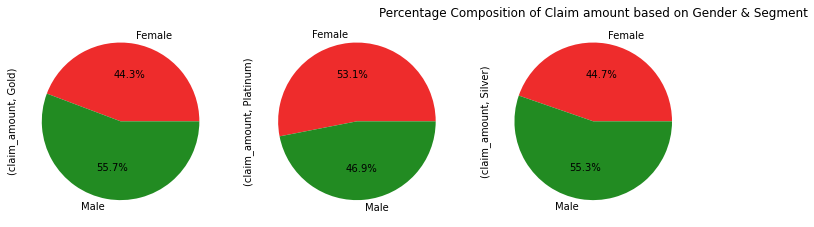

In [51]:
res1.plot.pie(figsize=(12,8), autopct='%1.01f%%', subplots=True, colors=['#ee2c2c','#228b22'], fontsize=10, legend=False)
plt.title('Percentage Composition of Claim amount based on Gender & Segment')
plt.show()

-----------------------------------------------------

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


In [52]:
new_df2= cust_claim.loc[cust_claim.incident_cause.str.lower().str.contains('driver'),:].reset_index(drop=True)
new_df2.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_Group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,42.0,Adult
1,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,36.0,Adult
2,21831191,Male,1977-05-17,NH,419-712-8513,Gold,91475471,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,0,43.0,Adult
3,18401412,Male,1999-03-02,AR,752-398-2914,Gold,12878692,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,0,21.0,Youth
4,99103685,Female,1985-12-30,KY,764-439-9856,Gold,74165873,Other driver error,2018-01-13,Home,No,Material only,1495.0,1.0,Yes,0,35.0,Adult


In [53]:
cross_gender_claimtype = new_df2.groupby(['gender'])[['gender']].count().add_prefix('count_of_').reset_index()
cross_gender_claimtype

,gender,count_of_gender
0,Female,221
1,Male,281


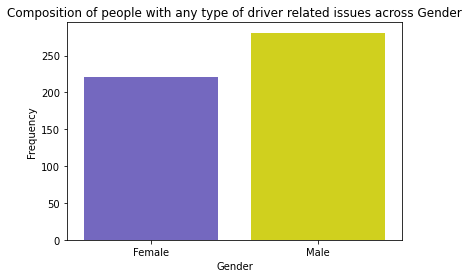

In [54]:
sns.barplot(x='gender', y='count_of_gender', data=cross_gender_claimtype, palette=['#6a5acd','#eeee00'])
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Composition of people with any type of driver related issues across Gender')
plt.show()

Male has claimed the most for either of the driver related issues.

-----------------------------------------------------

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [55]:
new_df3 = cust_claim.loc[cust_claim.fraudulent == 'Yes',:].reset_index(drop=True)
new_df3.head()


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_Group
0,33507197,Female,1966-09-09,RI,165-519-4583,Gold,63246959,Crime,2017-07-22,Auto,No,Material only,2748.500000,2.0,Yes,0,54.0,Adult
1,99103685,Female,1985-12-30,KY,764-439-9856,Gold,74165873,Other driver error,2018-01-13,Home,No,Material only,1495.000000,1.0,Yes,0,35.0,Adult
2,1407979,Male,1987-03-15,RI,165-217-1648,Silver,12548447,Driver error,2018-06-03,Auto,Unknown,Material only,3208.500000,1.0,Yes,0,33.0,Adult
3,70459181,Female,1988-09-03,NY,493-937-8297,Platinum,16773361,Other driver error,2017-10-10,Auto,No,Material only,2725.500000,1.0,Yes,0,32.0,Adult
4,31012778,Female,1993-06-09,MA,328-683-8359,Gold,28636278,Other causes,2018-03-01,Auto,No,Material only,12501.489635,5.0,Yes,0,27.0,Youth


In [56]:
res4 = new_df3.groupby('Age_Group')[['fraudulent']].count().add_prefix('Count_of_').reset_index()
res4

,Age_Group,Count_of_fraudulent
0,Adult,187
1,Senior,8
2,Youth,50


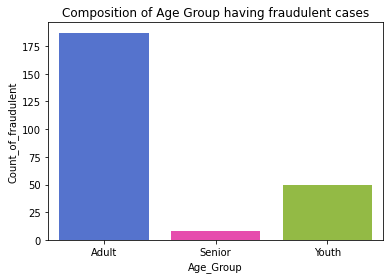

In [57]:
sns.barplot(x='Age_Group', y='Count_of_fraudulent', data=res4, palette=['#4169e1','#ff34b3','#9acd32'])
plt.title('Composition of Age Group having fraudulent cases')
plt.xticks(rotation=0)
plt.show()

People in the Adult Age Group from ages between 30 and 60 years had the maximum fraudulent cases.

-----------------------------------------------------

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. 
Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

#### Way1:

In [103]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [104]:
cust_claim['Claim_month'] = cust_claim['claim_date'].dt.strftime('%b')

In [105]:
cust_claim['Claim_month'] = pd.Categorical(cust_claim['Claim_month'], categories=months, ordered=True)

In [106]:
cust_claim['Claim_year'] = cust_claim.claim_date.dt.year

In [118]:
res5 = cust_claim.groupby(['Claim_year','Claim_month'])[['claim_amount']].sum().add_prefix('Total_').reset_index().round(2)
res5.head()

,Claim_year,Claim_month,Total_claim_amount
0,2017,Jan,608015.47
1,2017,Feb,631455.98
2,2017,Mar,615575.98
3,2017,Apr,749415.49
4,2017,May,546740.97


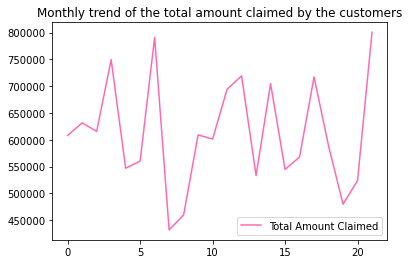

In [122]:
sns.lineplot(data=res5['Total_claim_amount'],
             color='hotpink', label='Total Amount Claimed')
plt.title('Monthly trend of the total amount claimed by the customers')
plt.show()

#### Way2:

In [110]:
cust_claim.claim_date

0      2017-11-27
1      2018-10-03
3      2018-04-04
5      2017-04-12
7      2018-09-26
          ...    
1080   2018-09-06
1081   2017-05-09
1082   2017-05-15
1083   2017-04-18
1084   2017-03-16
Name: claim_date, Length: 1078, dtype: datetime64[ns]

In [111]:
cust_claim['Claim_Mo_Year'] = cust_claim['claim_date'].dt.strftime('%Y-%m')

In [121]:
oup5 = cust_claim.groupby(['Claim_Mo_Year'])[['claim_amount']].sum().add_prefix('Total_').reset_index().round(2)
oup5.head()

,Claim_Mo_Year,Total_claim_amount
0,2017-01,608015.47
1,2017-02,631455.98
2,2017-03,615575.98
3,2017-04,749415.49
4,2017-05,546740.97


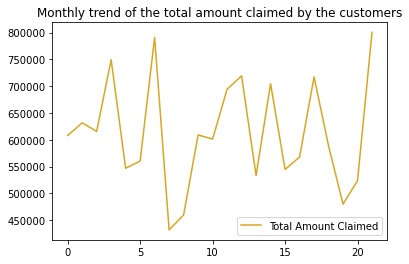

In [123]:
sns.lineplot(data=oup5['Total_claim_amount'],
             color='goldenrod', label='Total Amount Claimed')
plt.title('Monthly trend of the total amount claimed by the customers')
plt.show()

-----------------------------------------------------

### 15. 

What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


In [124]:
res6= cust_claim.groupby(['gender','Age_Group','fraudulent'])[['claim_amount']].mean().add_prefix('Avg_Of_').reset_index().round(2)
res6

,gender,Age_Group,fraudulent,Avg_Of_claim_amount
0,Female,Adult,No,12131.69
1,Female,Adult,Yes,12399.36
2,Female,Senior,No,12386.60
3,Female,Senior,Yes,2558.75
4,Female,Youth,No,13186.47
5,Female,Youth,Yes,8283.52
6,Male,Adult,No,12352.43
7,Male,Adult,Yes,15602.05
8,Male,Senior,No,11881.88
9,Male,Senior,Yes,20165.25


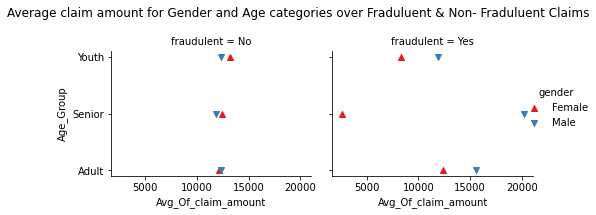

In [128]:
# step 1: Creating the FacetGrid object 
g = sns.FacetGrid(res6, col='fraudulent', hue='gender', palette='Set1', hue_kws=dict(marker=['^','v']))

# step 2: mapping the FacetGrid object with plot fn:
g= (g.map(plt.scatter,'Avg_Of_claim_amount', 'Age_Group'))
g.add_legend()


plt.suptitle('Average claim amount for Gender and Age categories over Fraduluent & Non- Fraduluent Claims')
plt.tight_layout()
plt.show()

-----------------------------------------------------

Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.


In [49]:
import scipy.stats as stats

### 16. Is there any similarity in the amount claimed by males and females?


We would be conducting Two sample independent T-test:
    
    H0: There is similarity or influence in the amount claimed by males and females 
        i/e amount claimed by females == amount claimed by males
        
    H0: There is no similarity or influence in the amount claimed by males and females
        i/e amount claimed by females != amount claimed by males
        
    It's a two-tailed test.

In [68]:
# Step 1: First, get the claim amounts made by Male and Female:

Male_claim_amount = cust_claim.claim_amount.loc[cust_claim.gender == 'Male']
Female_claim_amount = cust_claim.claim_amount.loc[cust_claim.gender == 'Female']

In [69]:
# Step 2: Take the Average of the Male and Female respective claim amounts:

print('The average amount claimed by Males is ${}.' .format(Male_claim_amount.mean()))
print('The average amount claimed by Females is ${}.' .format(Female_claim_amount.mean()))

The average amount claimed by Males is $12884.829631308425.
The average amount claimed by Females is $12100.692029236623.


Step 3: Conduct Two Sample Independent T-Test:

    We have two different assumptions : that Males and Females groups either have equal or unequal variance. We do not know this and hence will test for both assumptions.


In [70]:
# a) Male and Female groups have equal variance:

equal_var = stats.ttest_ind(a=Male_claim_amount, b=Female_claim_amount, equal_var=True)
equal_var

Ttest_indResult(statistic=0.9630529881732577, pvalue=0.3357373087404285)

In [71]:
tscore_equal_var = equal_var.statistic
tscore_equal_var

0.9630529881732577

In [72]:
# b) Male and Female groups do not have equal variance:

unequal_var = stats.ttest_ind(a=Male_claim_amount, b=Female_claim_amount, equal_var=False)
unequal_var

Ttest_indResult(statistic=0.9637241707490979, pvalue=0.33540080346197265)

In [73]:
tscore_unequal_var = unequal_var.statistic
tscore_unequal_var

0.9637241707490979

In [74]:
diff = tscore_equal_var - tscore_unequal_var
diff

-0.0006711825758402012

The T-test score under both the assumptions of Equal and unequal variance is not having much difference and hence, will take the equal variance as the assumption.

In [75]:
# p-value under the equal variance ass:

p_value = equal_var.pvalue
p_value

0.3357373087404285

In [77]:
print("The p-value is {} and T-score is {}.".format(p_value, tscore_equal_var))

The p-value is 0.3357373087404285 and T-score is 0.9630529881732577.


In [78]:
# Checking if p-value is greater or not than 5% alpha:
p_value > 0.05

True

#### Conclusion:
    
  Since the p-value from equal variance assumption is greater than the 5% alpha, hence with 95% confidence can conclude that we fail to reject the Null Hypothesis and conclude that there is no statistical significance between the male and female claim amount and are similar.


-----------------------------------------------------

### 17. Is there any relationship between age category and segment?


    Testing to check if relatioship exists between age category and segment as both the variables are categorical in nature, hence will be conducting Chi-Square test.
    
    H0: Observed values == Expected values
           (There is no relationship b/w Age Category and Segment)
           
    H1: Observed values <> Expected values
            (There is relationship b/w Age Category and Segment)
            
    This is a one-tailed test as Chi-Square dis is based only on one-tailed.

In [64]:
# Step 1: Create Cross Tab for the observed Values:

age_segment_tab = pd.crosstab(cust_claim.Age_Group, cust_claim.Segment, margins=True)
age_segment_tab


Segment,Gold,Platinum,Silver,All
Age_Group,,,,
Adult,284,258,252,794
Senior,7,16,10,33
Youth,80,87,84,251
All,371,361,346,1078


In [65]:
# Step 2: Chi Square test statistic -- it takes the observed values generated in the Step1 as input:

Chisqtest = stats.chi2_contingency(observed = age_segment_tab)
Chisqtest

# Output is a tuple giving: Chi-Sq statistics, p-value, degrees of freedom and expected matrix

(5.330850788096895,
 0.8045663351435193,
 9,
 array([[ 273.25974026,  265.89424861,  254.84601113,  794.        ],
        [  11.35714286,   11.05102041,   10.59183673,   33.        ],
        [  86.38311688,   84.05473098,   80.56215213,  251.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [66]:
print("The Chi square-score is {} and the p-value is {}.".format(Chisqtest[0], Chisqtest[1]))

The Chi square-score is 5.330850788096895 and the p-value is 0.8045663351435193.


In [67]:
# Checking if p-value is greater or not than 5% alpha:

Chisqtest[1] > 0.05

True

#### Conclusion:
    
As the p-value is more than the 5% alpha, hence with 95% confidence can conclude that we fail to reject the Null Hypothesis and conclude that there is no relationship between the Age Category and Segments and hence is not statistically significant.

-----------------------------------------------------

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

To test the below would be conducting One Sample T-Test:

H0: Avg Claim Amount of Current Year 2017-18 == Avg of Claim Amount of Year 2016-2017 (i/e) <= $10000

H1: Avg Claim Amount of Current Year 2017-18 > Avg of Claim Amount of Year 2016-2017 (i/e) > $10000 


It's a one-tailed test.

In [150]:
# Step 1: Finding the t-score and p-value for the test:

# Test Statistic as follows:

ttest_1 = stats.ttest_1samp(a= cust_claim.claim_amount, popmean = 10000)
t_Score = round(ttest_1.statistic,2)
p_value = ttest_1.pvalue

print("The p-value is {} and T-score is {}.".format(p_value, t_Score))

The p-value is 1.1156022878717526e-09 and T-score is 6.15.


In [151]:
# Checking if p-value is more than 5% alpha:

p_value > 0.05

False

In [152]:
# Step 2 : Checking the values of the sample and population mean:

population_mean = 10000

# Average of Claim Amount:

sample_mean = cust_claim.claim_amount.mean()
sample_mean

12501.489634748285

#### Conclusion from step 1:

As the p-value is lower than the 5% alpha, hence with 95% confidence can conclude that we will reject the Null Hypothesis that the average claim amount of current year 2017-18 is less than equal to average claim amount of Year 2016-2017 (i/e) less than $10000. Hence, it is statistically significant.


#### Conclusion from step 2:

For us to conclude, whether the average claim amount of current year is more than that of the previous year is, we would need to check the values of the sample mean and population mean.

As above, the sample_mean > population_mean, hence the average claim amount of current year is significantly more than $10000.

-----------------------------------------------------

### 19. Is there any difference between age groups and insurance claims?


We have multiple categories in age groups and will test to check the influence of those age categories on insurance claims hence will conduct ANOVA Test.

    H0: Mean of Adult == Mean of Youth == Mean of Senior
        (The age groups are same i.e no influence of age groups on Insurance Claims)

    H1: Mean of Adult <> Mean of Youth <> Mean of Senior
        (The agre groups are different i.e there is influence of age groups on Insurance Claims)

    This is a one-tailed test as ANOVA is based on F-Test, which is asymmetrical distribution, hence has only one-tail.

In [57]:
# Age Group values are:

adult = cust_claim.total_policy_claims.loc[cust_claim.Age_Group  == 'Adult']
senior = cust_claim.total_policy_claims.loc[cust_claim.Age_Group == 'Senior']
youth = cust_claim.total_policy_claims.loc[cust_claim.Age_Group  == 'Youth']

In [60]:
#Perform ANOVA

anova = stats.f_oneway(adult, senior, youth)
anova

F_onewayResult(statistic=1.1522040718080706, pvalue=0.31632950191820314)

In [61]:
print("The F-value is {} and the p-value is {}.".format (anova.statistic, anova.pvalue))

The F-value is 1.1522040718080706 and the p-value is 0.31632950191820314


In [62]:
# checking is pvalue is greater than alpha

anova.pvalue > 0.05

True

#### Conclusion:

As the p-value is greater than 5% alpha, therefore we fail to reject the Null Hypothesis and hence with 95% confidence can state that the age groups have no statistical significance on the insurance claims concluding the age groups have no influence over the insurance claims.

-----------------------------------------------------

### 20. Is there any relationship between total number of policy claims and the claimed amount?

To test the relationship between Claim amount and Total Policy claims, will conduct Test for Correlation.

    H0: There is no relation between Claim amount and Total Policy claims i/e both variables are uncorrelated\
    H1: There is relation between Claim amount and Total Policy claims i/e both variables are correlated

    It's a two-tailed test.

In [81]:
print(np.corrcoef(cust_claim['claim_amount'], cust_claim['total_policy_claims']))

[[ 1.         -0.02239272]
 [-0.02239272  1.        ]]


In [95]:
# Finding the Pearson Correlation Coeffecient using scipy package:

corr = stats.pearsonr(cust_claim.claim_amount, cust_claim.total_policy_claims)
corr

(-0.022392720732099906, 0.4626700742268617)

In [97]:
print('correleation coefficient:', corr[0])
print('p-value:', corr[1])

correleation coefficient: -0.022392720732099906
p-value: 0.4626700742268617


In [131]:
# Checking if p-value is greater or not than 5% alpha:

corr[1] >0.05

True

#### Observation:

The correlation coffiecient is: -0.022392720732099906 and is less than the p-value of 0.4626700742268617.
As the p-value is higher than the 5% alpha, with 95% confidence can conclude that we fail to reject the Null Hypothesis that there is no relation between Claim amount and Total Policy claims.

We can also infer from the correlation coefficient is very low and negative suggesting there is not any relationship between Claim amount and Total Policy claims and is represented in the graph below as well.

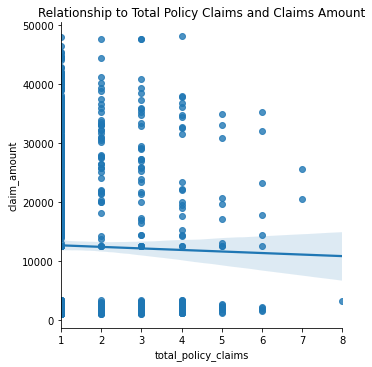

In [43]:
sns.lmplot(x= 'total_policy_claims',y = 'claim_amount', data=cust_claim, palette='Set2')
plt.title('Relationship to Total Policy Claims and Claims Amount')
plt.show()

-----------------------------------------------------